In [1]:
#Importing pandas and the EpiDisplay folder
import pandas as pd
import numpy as np
import pyreadr
import os
import matplotlib.pyplot as plt
import seaborn as sns

#path to .rdata file
file_path = "/Users/marthinmandig/Downloads/epiDisplay/data/Outbreak.rdata"

#read rdata file
result = pyreadr.read_r(file_path)

#check objects inside
print(result.keys())

odict_keys(['Outbreak'])


In [2]:
#Extract dataset

df = result['Outbreak']

#Preview dataset
print(df.head())

    id  sex   age         exptime  beefcurry  saltegg  eclair  water  \
0  1.0  1.0  13.0  25330825180000        1.0      1.0     1.0    1.0   
1  2.0  1.0  14.0  25330825180000        1.0      1.0     0.0    1.0   
2  3.0  1.0  13.0  25330825180000        1.0      1.0     0.0    1.0   
3  4.0  1.0  15.0  25330825180000        1.0      1.0     0.5    1.0   
4  5.0  1.0  14.0  25330825180000        1.0      1.0     0.0    1.0   

            onset  nausea  vomiting  abdpain  diarrhea  
0  25330825220000     1.0       1.0      1.0       1.0  
1             NaN     0.0       0.0      0.0       0.0  
2             NaN     0.0       0.0      0.0       0.0  
3             NaN     0.0       0.0      0.0       0.0  
4             NaN     0.0       0.0      0.0       0.0  


# Recreating summ() function in python

In [ ]:
#summ() function = Summary of data frame in a convenient table. Summary of a variable with statistics and graph. Includes the mean, median, standard deviation, min, and max.
#Must compare two or more variables

#Creating the function
def summ(series):
    clean_series = series.dropna()
    summary = {
        "obs": clean_series.count(),
        "mean": clean_series.mean(),
        "median": clean_series.median(),
        "s.d.": clean_series.std(),
        "min": clean_series.min(),
        "max": clean_series.max()
    }
    return summary


# Summary of age for males 13+ with nausea
subset = df[(df['sex'] == 1) & (df['age'] >= 13) & (df['age'] != 99) & (df['nausea'] == 1)]
print(summ(subset['age']))

{'obs': 261, 'mean': 19.82375478927203, 'median': 19.0, 's.d.': 6.293431472057723, 'min': 13.0, 'max': 58.0}


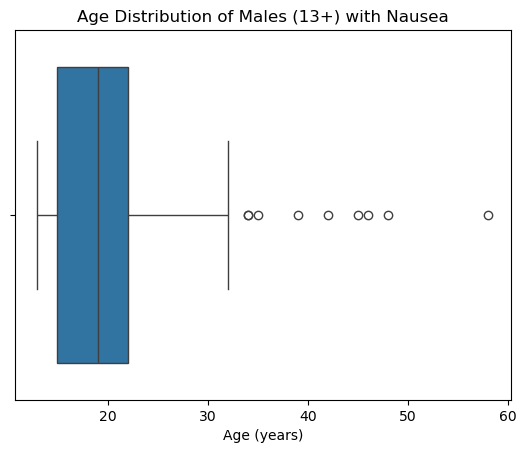

sex        
0.0  obs       368.000000
     mean       18.725543
     median     16.000000
     s.d.        7.955818
     min         1.000000
     max        50.000000
1.0  obs       666.000000
     mean       19.650150
     median     18.000000
     s.d.        7.714598
     min         1.000000
     max        58.000000
Name: age, dtype: float64


In [5]:
#Creating the visualization aspect (Not part of the function but a way to see the comparison)

# Boxplot
sns.boxplot(x=subset['age'])
plt.title("Age Distribution of Males (13+) with Nausea")
plt.xlabel("Age (years)")
plt.show()

grouped = df[df['age'] != 99].groupby('sex')['age'].apply(summ)
print(grouped)